In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

<h1>Air Store Info DB from csv</h1>

In [131]:
df = pd.read_csv("../input/air_store_info.csv")

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
air_store_id      829 non-null object
air_genre_name    829 non-null object
air_area_name     829 non-null object
latitude          829 non-null float64
longitude         829 non-null float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB


In [133]:
df.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [134]:
df.describe()

,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


In [135]:
df.isnull().values.any()

False

Data is clean and it does not contain any missing values.

<h2>Column: air_store_id</h2>

In [136]:
print('The dataset contains info about %s restaurants' % len(df['air_store_id'].unique()))

The dataset contains info about 829 restaurants


In [137]:
df['air_store_id'].describe()

count                      829
unique                     829
top       air_f6b2489ccf873c3b
freq                         1
Name: air_store_id, dtype: object

In [138]:
# Check if there are duplicated air Store Ids
df[df.duplicated(['air_store_id'])]

,air_store_id,air_genre_name,air_area_name,latitude,longitude


Dataset is clean and it does not contain any duplicated entry :) That's great!

<h2>Column: air_genre_name</h2>

In [139]:
print(df['air_genre_name'].describe())
print('\n******************************************')
print('%s diffrent genere that in air\n'%len(df['air_genre_name'].unique()))
print('******************************************')
#count the amount of genre that we have
print(df['air_genre_name'].value_counts())

count         829
unique         14
top       Izakaya
freq          197
Name: air_genre_name, dtype: object

******************************************
14 diffrent genere that in air

******************************************
Izakaya                         197
Cafe/Sweets                     181
Dining bar                      108
Italian/French                  102
Bar/Cocktail                     79
Japanese food                    63
Other                            27
Yakiniku/Korean food             23
Western food                     16
Okonomiyaki/Monja/Teppanyaki     14
Creative cuisine                 13
Karaoke/Party                     2
International cuisine             2
Asian                             2
Name: air_genre_name, dtype: int64


<h2>Column: air_area_name</h2>

In [140]:
print(df['air_area_name'].describe())
print('\n***********************************')
print(df['air_area_name'].value_counts())

count                                829
unique                               103
top       Fukuoka-ken Fukuoka-shi Daimyō
freq                                  64
Name: air_area_name, dtype: object

***********************************
Fukuoka-ken Fukuoka-shi Daimyō                   64
Tōkyō-to Shibuya-ku Shibuya                      58
Tōkyō-to Minato-ku Shibakōen                     51
Tōkyō-to Shinjuku-ku Kabukichō                   39
Tōkyō-to Setagaya-ku Setagaya                    30
Tōkyō-to Chūō-ku Tsukiji                         29
Ōsaka-fu Ōsaka-shi Ōgimachi                      25
Hiroshima-ken Hiroshima-shi Kokutaijimachi       23
Tōkyō-to Meguro-ku Kamimeguro                    22
Tōkyō-to Suginami-ku Asagayaminami               21
Hokkaidō Sapporo-shi Minami 3 Jōnishi            21
Tōkyō-to Chiyoda-ku Kudanminami                  20
Ōsaka-fu Ōsaka-shi Kyūtarōmachi                  19
Miyagi-ken Sendai-shi Kamisugi                   17
Hyōgo-ken Kōbe-shi Kumoidōri        

<h1>New columns extension </h1>
<p>extension for air_area_name</p>
<ul>For example: Fukuoka-ken Fukuoka-shi Shiobaru 
<li>region - Fukuoka-ken</li>
<li>city - Fukuoka-shi</li>
<li>street - Shiobaru</li>
</ul>

INFO: The air_area_name_region column contains information about location: prefecture, capital or ward, and area. Thus we can split that information into separate columns.

In [141]:
area_split = df['air_area_name'].str.split(' ', expand=True)

df['region'] = area_split[0]
df['city'] = area_split[1]
df['street'] = area_split.iloc[:, 2:].apply(lambda row: ' '.join(row.dropna()), axis=1)


In [117]:
len(df[df['city']=='Sapporo-shi']['air_store_id'].unique())

29

In [142]:
df.tail()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,region,city,street
824,air_9bf595ef095572fb,International cuisine,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,Tōkyō-to,Shibuya-ku,Shibuya
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,Tōkyō-to,Shibuya-ku,Shibuya
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,Tōkyō-to,Shibuya-ku,Shibuya
827,air_7514d90009613cd6,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956,Hokkaidō,Sapporo-shi,Minami 3 Jōnishi
828,air_c8fe396d6c46275d,Karaoke/Party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956,Hokkaidō,Sapporo-shi,Minami 3 Jōnishi


In [143]:
print('************ Region_Air_Area_Name ***************')
print(df['region'].describe())
print('\n****************************************')
#print(df['region_air_area_name'].unique())
#print('\n****************************************')
#print(df['region'].value_counts())
#df['num_region'] = df['air_area_name'].value_counts()
     
print('\n\n************ Ward_Air_Area_Name ***************')
print(df['city'].describe())
print('\n****************************************')
print(df['city'].value_counts())


print('\n\n************ Area_Air_Area_Name ***************')
print(df['street'].describe())
print('\n****************************************')
print(df['street'].value_counts())


# Hokkaidō Sapporo-shi Minami 3 Jōnishi 
# Hokkaidō Asahikawa-shi  6 Jōdōri    
# Hokkaidō Sapporo-shi Atsubetsuchūō 1 Jō    
# Niigata-ken Niigata-shi Gakkōchōdōri 1 Banchō 

************ Region_Air_Area_Name ***************
count          829
unique           9
top       Tōkyō-to
freq           444
Name: region, dtype: object

****************************************


************ Ward_Air_Area_Name ***************
count             829
unique             55
top       Fukuoka-shi
freq              103
Name: city, dtype: object

****************************************
Fukuoka-shi         103
Ōsaka-shi            66
Shibuya-ku           64
Minato-ku            61
Shinjuku-ku          43
Chūō-ku              43
Setagaya-ku          39
Sapporo-shi          29
Meguro-ku            26
Hiroshima-shi        25
Kōbe-shi             25
Toshima-ku           23
Chiyoda-ku           22
Taitō-ku             22
Suginami-ku          21
Sendai-shi           17
Asahikawa-shi        13
Kōtō-ku              13
Hamamatsu-shi        13
Niigata-shi          10
Kakogawa-shi         10
Himeji-shi            9
Kitakyūshū-shi        9
Itoshima-shi          7
Bunkyō-ku             

<h2>Columns latitude and longitude</h2>

In [144]:
print('***********  latitude    *************')
print(df['latitude'].describe())
print('\n')
print("the data set have %s diffrent latitude"%len(df['latitude'].unique()))
print('\n\n')

print('***********  longitude    *************')
print(df['longitude'].describe())
print('\n')
print("the data set have %s diffrent longitude"%len(df['longitude'].unique()))

***********  latitude    *************
count    829.000000
mean      35.647042
std        2.084659
min       33.211967
25%       34.695124
50%       35.658068
75%       35.694003
max       44.020632
Name: latitude, dtype: float64


the data set have 108 diffrent latitude



***********  longitude    *************
count    829.000000
mean     137.415311
std        3.650971
min      130.195555
25%      135.341564
50%      139.685474
75%      139.751599
max      144.273398
Name: longitude, dtype: float64


the data set have 108 diffrent longitude


In [145]:
## Ploting bivariate relationtips. This graph will show the scatterplot for each combination and at 
## the diagonal will show the histogram of the variable. This graph helps to detect correlations and 
## outliers
#sns.pairplot(df)

In [146]:
#df['bla'] = df['region'].astype('category')

In [147]:
#df['num_region']

In [148]:
#df['bla'].describe()

In [149]:
#df['ai'] = df['air_store_id'].astype('category')

In [150]:
print(len(df['region'].value_counts()))
print("We have %s diffrent regions in this AIR"%len(df['region'].unique()))
print(len(df['city'].value_counts()))
print("We have %s diffrent cities in this AIR"%len(df['city'].unique()))
print(len(df['street'].value_counts()))
print("We have %s diffrent streets in this AIR"%len(df['street'].unique()))

9
We have 9 diffrent regions in this AIR
55
We have 55 diffrent cities in this AIR
100
We have 100 diffrent streets in this AIR


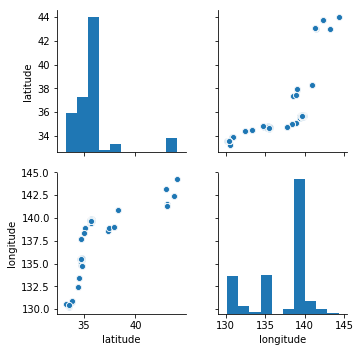

In [152]:
sns.pairplot(df)
#df.dtypes
